In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [15]:
column_names=["user_Id","item_id","Ratings","timestamp"]
df=pd.read_csv("u.data",sep="\t",names=column_names)


In [16]:
df.head()

,user_Id,item_id,Ratings,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [17]:
movie_titles=pd.read_csv("Movie_Id_Titles")

In [18]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [19]:
Ratings=pd.merge(df,movie_titles,on="item_id")

In [20]:
Ratings.head()

,user_Id,item_id,Ratings,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [22]:
Ratings.groupby("title")["Ratings"].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: Ratings, dtype: float64

In [23]:
Ratings.groupby("title")["Ratings"].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: Ratings, dtype: int64

In [26]:
Ratings_new=pd.DataFrame(Ratings.groupby("title")["Ratings"].mean())
Ratings_new.head()

,Ratings
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [27]:
Ratings_new["num of ratings"]=pd.DataFrame(Ratings.groupby("title")["Ratings"].count())
Ratings_new.head()

,Ratings,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


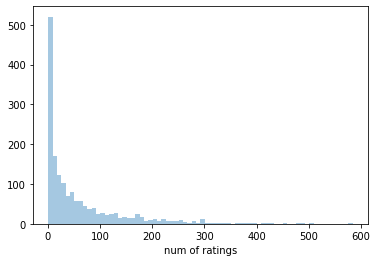

In [29]:
sns.distplot(Ratings_new["num of ratings"],bins=70,kde=False)

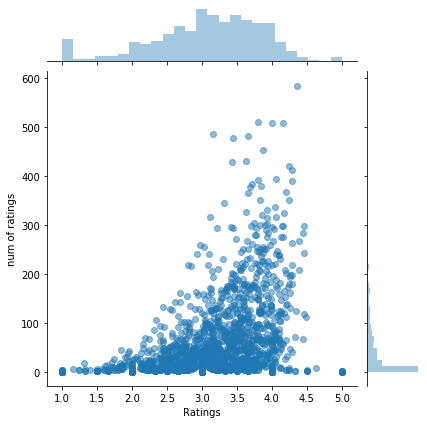

In [31]:
sns.jointplot(x="Ratings",y="num of ratings",data=Ratings_new,alpha=0.5)

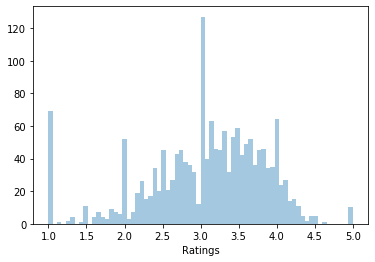

In [32]:
sns.distplot(Ratings_new["Ratings"],bins=70,kde=False)

In [34]:
Ratings.head()

,user_Id,item_id,Ratings,timestamp,title,num of ratings
0,0,50,5,881250949,Star Wars (1977),NaN
1,290,50,5,880473582,Star Wars (1977),NaN
2,79,50,4,891271545,Star Wars (1977),NaN
3,2,50,5,888552084,Star Wars (1977),NaN
4,8,50,5,879362124,Star Wars (1977),NaN


In [36]:
moviemat=pd.pivot_table(index="user_Id",columns="title",values="Ratings",data=Ratings)

In [37]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_Id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
Ratings_new.sort_values(by="num of ratings",ascending=False).head(10)

,Ratings,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [47]:
starwars_user_ratings=moviemat["Star Wars (1977)"]
liarliar_user_ratings=moviemat["Liar Liar (1997)"]

In [53]:
starwars_user_ratings.head(5)
starwars_corr=moviemat.corrwith(starwars_user_ratings)

C:\Users\mashood\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\mashood\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [54]:
liarliar_corr=moviemat.corrwith(liarliar_user_ratings)

In [57]:
starwars_corr.head(10)
starwars_corr.dropna(inplace=True)

In [58]:
starwars_corr.head(10)

title
'Til There Was You (1997)              0.872872
1-900 (1994)                          -0.645497
101 Dalmatians (1996)                  0.211132
12 Angry Men (1957)                    0.184289
187 (1997)                             0.027398
2 Days in the Valley (1996)            0.066654
20,000 Leagues Under the Sea (1954)    0.289768
2001: A Space Odyssey (1968)           0.230884
39 Steps, The (1935)                   0.106453
8 1/2 (1963)                          -0.142977
dtype: float64

In [65]:
df_new=pd.DataFrame(starwars_corr,columns=["Correlation"])

In [66]:
df_new=df_new.join(Ratings_new["num of ratings"])

In [67]:
df_new.head(10)

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
2 Days in the Valley (1996),0.066654,93
"20,000 Leagues Under the Sea (1954)",0.289768,72
2001: A Space Odyssey (1968),0.230884,259
"39 Steps, The (1935)",0.106453,59


In [70]:
df_new[df_new["num of ratings"]>100].sort_values(by="num of ratings",ascending=False).head(10)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
Contact (1997),0.134962,509
Fargo (1996),0.044415,508
Return of the Jedi (1983),0.672556,507
Liar Liar (1997),0.150292,485
"English Patient, The (1996)",0.049013,481
Scream (1996),0.134648,478
Toy Story (1995),0.180020,452
Air Force One (1997),0.113164,431


In [71]:
liarliar_user_ratings.head(10)

user_Id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
5    NaN
6    2.0
7    1.0
8    3.0
9    4.0
Name: Liar Liar (1997), dtype: float64

In [72]:
liarliar_corr=moviemat.corrwith(liarliar_user_ratings)

In [74]:
liarliar_corr.head(20)
liarliar_corr.dropna(inplace=True)

In [75]:
df2=pd.DataFrame(liarliar_corr,columns=["Correlation"])

In [76]:
df2.head(10)

,Correlation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739
"20,000 Leagues Under the Sea (1954)",-0.027932
2001: A Space Odyssey (1968),-0.057864
"39 Steps, The (1935)",0.400918
8 1/2 (1963),0.178064


In [77]:
df2=df2.join(Ratings_new["num of ratings"])

In [78]:
df2.head(10)

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93
"20,000 Leagues Under the Sea (1954)",-0.027932,72
2001: A Space Odyssey (1968),-0.057864,259
"39 Steps, The (1935)",0.400918,59
8 1/2 (1963),0.178064,38


In [81]:
df2[df2["num of ratings"]>100].sort_values(by="num of ratings",ascending=False).head(10)

,Correlation,num of ratings
title,,
Star Wars (1977),0.150292,584
Contact (1997),0.022878,509
Fargo (1996),-0.110496,508
Return of the Jedi (1983),0.227837,507
Liar Liar (1997),1.000000,485
"English Patient, The (1996)",0.010082,481
Scream (1996),0.172144,478
Toy Story (1995),0.342576,452
Air Force One (1997),0.185401,431
